refs 
https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e

https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb



In [1]:
import pymc3 as pm


WARNING (theano.configdefaults): We are not able to detect the number of CPU cores. We disable openmp by default. To remove this warning, set the environment variable OMP_NUM_THREADS to the number of threads you want theano to use.


In [2]:
import pandas as pd
import numpy as np


In [32]:
wine = pd.read_csv("./winequality-red.csv", sep=';')

In [33]:
wine_renamed = wine.rename(columns={column : column.replace(' ', '_') for column in wine.columns})

In [103]:
wine.loc[1]

fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
quality                  5.0000
Name: 1, dtype: float64

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_except_quality = wine.drop('quality', axis=1)

In [7]:
wine_except_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
wine_except_quality.as_matrix().shape

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(1599, 11)

In [9]:
x = wine_except_quality.values

In [10]:
x.shape

(1599, 11)

In [11]:
y = wine.quality.values

In [26]:
wine_except_quality_renamed = wine_except_quality.rename(columns={column : column.replace(' ', '_') for column in wine_except_quality.columns})

In [27]:
formula = 'quality ~ ' + ' + '.join(['%s' % variable for variable in wine_except_quality_renamed.columns])

In [28]:
formula

'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [35]:
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = wine_renamed, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)#njobs=-1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, alcohol, sulphates, pH, density, total_sulfur_dioxide, free_sulfur_dioxide, chlorides, residual_sugar, citric_acid, volatile_acidity, fixed_acidity, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [20:14<00:00,  1.82draws/s]
/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The e

In [37]:
pm.summary(normal_trace)

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,17.414562,21.713394,1.784678,-27.455192,60.060619,73.457990,1.002308
fixed_acidity,0.021122,0.025376,0.001847,-0.029888,0.067959,87.618861,1.012874
volatile_acidity,-1.088368,0.121187,0.006427,-1.328139,-0.850014,264.883726,1.000294
citric_acid,-0.188595,0.149828,0.007994,-0.480395,0.117891,316.828145,1.003599
residual_sugar,0.014485,0.014962,0.000934,-0.013813,0.045011,156.004069,1.000820
chlorides,-1.865881,0.412576,0.018587,-2.681803,-1.094760,412.244041,0.999811
free_sulfur_dioxide,0.004183,0.002145,0.000110,0.000008,0.008527,289.412363,1.006002
total_sulfur_dioxide,-0.003203,0.000741,0.000037,-0.004657,-0.001738,273.821134,1.006481
density,-13.254709,22.128547,1.822961,-56.594934,32.662367,73.115545,1.002633
pH,-0.434061,0.185838,0.011552,-0.784081,-0.066841,132.665138,1.010835


In [78]:
pm.summary(normal_trace)['mean'].dot()

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Intercept               17.414562
fixed_acidity            0.021122
volatile_acidity        -1.088368
citric_acid             -0.188595
residual_sugar           0.014485
chlorides               -1.865881
free_sulfur_dioxide      0.004183
total_sulfur_dioxide    -0.003203
density                -13.254709
pH                      -0.434061
sulphates                0.905191
alcohol                  0.281450
sd                       0.648423
Name: mean, dtype: float64

In [80]:
normal_trace.varnames

['Intercept',
 'fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'sd_log__',
 'sd']

In [81]:
observation = pd.Series({'Intercept': 1, 'fixed_acidity': 4, 'volatile_acidity': 0, 
                            'citric_acid': 1, 'residual_sugar': 3,
                            'chlorides': 1, 'free_sulfur_dioxide': 1,
                         "total_sulfur_dioxide": 2, "density": 0.1,
                            "pH": 2, "sulphates": 0.1,
                         "alcohol": 0.1,
                        })

In [108]:
wine.loc[1][:-1]

fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
Name: 1, dtype: float64

In [127]:
obs = wine_renamed.loc[1][:-1]

In [128]:
intercept =  pd.Series({'Intercept': 1})

In [129]:
obs = intercept.append(obs)

In [130]:
obs

Intercept                1.0000
fixed_acidity            7.8000
volatile_acidity         0.8800
citric_acid              0.0000
residual_sugar           2.6000
chlorides                0.0980
free_sulfur_dioxide     25.0000
total_sulfur_dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
dtype: float64

In [131]:
pm.summary(normal_trace)['mean'][obs.index]

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Intercept               17.414562
fixed_acidity            0.021122
volatile_acidity        -1.088368
citric_acid             -0.188595
residual_sugar           0.014485
chlorides               -1.865881
free_sulfur_dioxide      0.004183
total_sulfur_dioxide    -0.003203
density                -13.254709
pH                      -0.434061
sulphates                0.905191
alcohol                  0.281450
Name: mean, dtype: float64

In [145]:
pm.summary(normal_trace)

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,17.414562,21.713394,1.784678,-27.455192,60.060619,73.457990,1.002308
fixed_acidity,0.021122,0.025376,0.001847,-0.029888,0.067959,87.618861,1.012874
volatile_acidity,-1.088368,0.121187,0.006427,-1.328139,-0.850014,264.883726,1.000294
citric_acid,-0.188595,0.149828,0.007994,-0.480395,0.117891,316.828145,1.003599
residual_sugar,0.014485,0.014962,0.000934,-0.013813,0.045011,156.004069,1.000820
chlorides,-1.865881,0.412576,0.018587,-2.681803,-1.094760,412.244041,0.999811
free_sulfur_dioxide,0.004183,0.002145,0.000110,0.000008,0.008527,289.412363,1.006002
total_sulfur_dioxide,-0.003203,0.000741,0.000037,-0.004657,-0.001738,273.821134,1.006481
density,-13.254709,22.128547,1.822961,-56.594934,32.662367,73.115545,1.002633
pH,-0.434061,0.185838,0.011552,-0.784081,-0.066841,132.665138,1.010835


In [138]:
obs[:-1].size

11

In [139]:
pm.summary(normal_trace)['mean'][obs[:-1].index].size

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


11

In [140]:
np.dot(pm.summary(normal_trace)['mean'][obs.index], obs)

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


5.138751825305455

In [144]:
np.dot(pm.summary(normal_trace)['mean'][obs[:-4].index], obs[:-4])

/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


16.366305447175183

In [92]:
var_dict = {}
for variable in normal_trace.varnames:
    var_dict[variable] = normal_trace[variable]
    
# Standard deviation
sd_value = var_dict['sd'].mean()

# Results into a dataframe
_var_weights = pd.DataFrame(var_dict)

# Align weights and new observation
var_weights = _var_weights[observation.index]

# Means of variables
var_means = var_weights.mean(axis=0)

# Mean for observation
mean_loc = np.dot(var_means, observation)

# Distribution of estimates
estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)


In [99]:
np.dot(_var_weights[observation.index].mean(), observation)

13.410874293322726

In [147]:
estimates.mean()

13.432028723089672

In [100]:
_var_weights

,Intercept,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,sd_log__,sd
0,28.986474,0.007898,-1.148245,-0.031434,0.007970,-1.616657,0.005036,-0.004359,-24.378911,-0.404651,0.798493,0.246607,-0.428050,0.651779
1,28.502872,0.010006,-1.194720,-0.090482,0.009252,-1.810938,0.005674,-0.004435,-23.650506,-0.443524,0.851920,0.234499,-0.426094,0.653055
2,27.824293,0.010255,-1.239823,-0.128294,0.011717,-1.531528,0.007617,-0.004211,-23.429346,-0.447357,0.826714,0.274736,-0.435592,0.646882
3,22.916700,0.006851,-1.161275,-0.020984,0.012778,-1.665276,0.008105,-0.004625,-18.549009,-0.428600,0.795271,0.278354,-0.428537,0.651462
4,20.992356,0.003968,-1.028652,0.055689,0.015680,-1.763153,0.006851,-0.003646,-16.331326,-0.524073,0.797115,0.268407,-0.428279,0.651629
5,22.456574,0.004710,-1.076109,0.065544,0.017358,-2.046637,0.007168,-0.003789,-17.857472,-0.507443,0.841354,0.267816,-0.416898,0.659088
6,21.831752,0.002947,-1.047223,0.061417,0.023882,-1.758645,0.005631,-0.003755,-17.358054,-0.508697,0.825343,0.279029,-0.419437,0.657417
7,19.892002,0.022286,-1.149828,-0.106151,0.018780,-1.728953,0.004264,-0.003430,-16.031227,-0.231762,0.701303,0.256998,-0.459857,0.631374
8,18.833746,0.010119,-1.191317,0.016906,0.019094,-1.771661,0.005550,-0.003359,-14.813002,-0.273022,0.708258,0.263507,-0.443471,0.641805
9,14.077993,0.011912,-1.178056,0.032427,0.019235,-1.736385,0.006184,-0.003440,-10.091745,-0.291733,0.737074,0.263911,-0.451929,0.636400


In [85]:
mean_loc

13.410874293322726

In [66]:
normal_trace['sd'].mean()

0.6484234332005951

In [76]:
normal_trace['Intercept'].mean()

17.41456176414109

In [38]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 17.4146
Variable: fixed_acidity   Mean weight in model: 0.0211
Variable: volatile_acidity Mean weight in model: -1.0884
Variable: citric_acid     Mean weight in model: -0.1886
Variable: residual_sugar  Mean weight in model: 0.0145
Variable: chlorides       Mean weight in model: -1.8659
Variable: free_sulfur_dioxide Mean weight in model: 0.0042
Variable: total_sulfur_dioxide Mean weight in model: -0.0032
Variable: density         Mean weight in model: -13.2547
Variable: pH              Mean weight in model: -0.4341
Variable: sulphates       Mean weight in model: 0.9052
Variable: alcohol         Mean weight in model: 0.2814
Variable: sd_log__        Mean weight in model: -0.4334
Variable: sd              Mean weight in model: 0.6484


UsageError: Missing module name.


In [53]:
!pip install arviz

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [54]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
 %autoreload 2



In [56]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')


In [57]:
plot_trace(normal_trace);


/Users/user/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


ImportError: ArviZ is not installed. In order to use `plot_trace`:
pip install arviz

In [58]:
pm.traceplot(normal_trace);


ImportError: ArviZ is not installed. In order to use `plot_trace`:
pip install arviz

In [59]:
pm.forestplot(normal_trace);


ImportError: ArviZ is not installed. In order to use `plot_forest`:
pip install arviz

In [60]:
pm.plot_posterior(normal_trace, figsize = (14, 14), text_size=20);


ImportError: ArviZ is not installed. In order to use `plot_posterior`:
pip install arviz

In [61]:
y.shape

(1599,)

In [62]:
#sm.add_constant(wine_except_quality)

In [63]:
#model = smf.OLS(wine.quality, wine_except_quality)

In [64]:
#result = model.fit()

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.108e+04
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:33:43   Log-Likelihood:                -1569.7
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3221.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0042      0.016      0.255      0.799      -0.028       0.036
volatile acidity        -1.0997      0.120     -9.157      0.000      -1.335      -0.864
citric acid             -0.1841      0.147     -1.251      0.211      -0.473       0.105
residual sugar           0.0071      0.012      0.587      0.557      -0.017       0.031
chlorides               -1.9114      0.418     -4.575      0.000      -2.731      -1.092
free sulfur dioxide      0.0045      0.002      2.102      0.036       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.565      0.000      -0.005      -0.002
density                  4.5291      0.625      7.243      0.000       3.303       5.756
pH                      -0.5229      0.160     -3.268      0.001      -0.837      -0.209
sulphates                0.8871      0.111      8.006      0.000       0.670       1.104
alcohol                  0.2970      0.017     17.217      0.000       0.263       0.331
==============================================================================
Omnibus:                       25.388   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.530
Skew:                          -0.159   Prob(JB):                     7.09e-09
Kurtosis:                       3.680   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
from sklearn import datasets

In [31]:
boston_data = datasets.load_boston()

In [48]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [49]:
price = pd.DataFrame({"price": boston_data.target})

In [62]:
boston_x = sm.add_constant(boston)

In [72]:
boston_x.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [63]:
model_boston = smf.OLS(price, boston_x)

In [64]:
reuslt_boston = model_boston.fit()

In [66]:
reuslt_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          6.95e-135
Time:                        00:47:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
import matplotlib.pyplot as plt


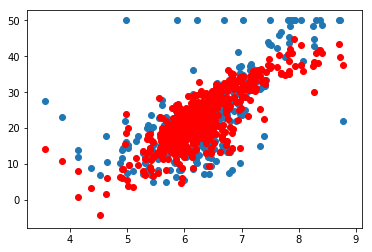

In [71]:
plt.scatter(boston.RM, price)
plt.scatter(boston.RM, reuslt_boston.predict(boston_x), color='red')

In [82]:
reuslt_boston.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64